# Análisis computational de datos lingüísticos - 2021

## 1. Análisis de co-ocurrencias

### Datos: agradecimientos a https://github.com/rivaquiroga/programas-presidenciales-2021

In [18]:
## datos

## kast
data_kast = open("2021_kast_partido-republicano-de-chile_primera-vuelta.txt", "r", encoding="utf-8")
data_kast = data_kast.read()

## boric
data_boric = open("2021_boric_pacto-apruebo-dignidad_primera-vuelta.txt", "r", encoding="utf-8")
data_boric = data_boric.read()

In [19]:
data_kast[:100]

'ATRÉVETE Chile\nUn Manifiesto Republicano\nEs innegable que Chile atraviesa un momento decisivo en su '

In [20]:
data_boric[:100]

'Plan de Recuperación Económica y Estrategia Sanitaria\nPLAN DE REACTIVACIÓN ECONÓMICA\nLo principal pa'

In [21]:
data_kast = data_kast.replace('\n',' ')

In [23]:
data_boric = data_boric.replace('\n',' ')

In [24]:
from nltk import sent_tokenize

In [25]:
data_kast = sent_tokenize(data_kast)

In [27]:
len(data_kast)

3287

In [28]:
data_kast[:5]

['ATRÉVETE Chile Un Manifiesto Republicano Es innegable que Chile atraviesa un momento decisivo en su historia.',
 'Tenemos que volver a discutir sobre los principios que nos nutren y los objetivos que aspiramos alcanzar como sociedad y como país.',
 'La polarización, el debilitamiento institucional, el estancamiento económico producto de años de reformas de corte socialista y los intrincados momentos que hemos atravesado, como la violencia acaecida desde el 18 de octubre de 2019 y la pandemia del COVID-19, nos demostraron la fragilidad de fundamentos como la libertad, el orden, el Estado de Derecho, la propiedad privada y la economía de libre mercado, todos los anteriores, cimientos en los que se sostuvieron las décadas más exitosas en la historia de Chile.',
 'Muchos pensaban que el progreso estaba asegurado, que la pobreza y la desigualdad continuarían reduciéndose1, los sueldos y bienestar social aumentando y que Chile seguiría siendo el país con mayor movilidad social de la Organi

In [26]:
data_boric = sent_tokenize(data_boric)

In [29]:
len(data_boric)

2436

In [30]:
data_boric[:5]

['Plan de Recuperación Económica y Estrategia Sanitaria PLAN DE REACTIVACIÓN ECONÓMICA Lo principal para la reactivación económica es lograr controlar la pandemia.',
 'Por esta razón, dividimos nuestra propuesta de recuperación en dos secciones.',
 'La primera es la económica, que se describe a continuación, y una segunda, que tiene que ver con lo netamente sanitario para hacer frente a la pandemia.',
 'Nuestra propuesta de reactivación económica tiene dos pilares: el empleo femenino y la inversión verde.',
 'Nuestro horizonte no solo es volver a los índices económicos previos a la pandemia, sino que vemos en la reactivación una oportunidad de recuperación que gire hacia un nuevo modelo.']

In [31]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download es_dep_news_trf

  Using cached pip-21.3.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.2.0
    Uninstalling setuptools-58.2.0:
      Successfully uninstalled setuptools-58.2.0
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\jxver\\AppData\\Local\\Temp\\pip-uninstall-7yvywfj5\\pip.exe'
Consider using the `--user` option or check the permissions.



  Preparing metadata (setup.py): started

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
es-core-news-sm 3.1.0 requires spacy<3.2.0,>=3.1.0, but you have spacy 3.2.0 which is incompatible.



  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langcodes: filename=langcodes-3.2.1-py3-none-any.whl size=169396 sha256=6d0e217e1eeb49cbc9ebe93b315fc08f780d868e70f4154781cb890958a14e73
  Stored in directory: c:\users\jxver\appdata\local\pip\cache\wheels\aa\5b\45\2e2ebdd7b888ba82dac447122f8ea0f4a2404910516d486679
Successfully built langcodes
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.10
    Uninstalling thinc-8.0.10:
      Successfully uninstalled thinc-8.0.10
  Attempting uninstall: spacy
    Found existing installation: spacy 3.1.3
    Uninstalling spacy-3.1.3:
      Successfully uninstalled spacy-3.1.3
[+] Download and installation successful
You can now load the package via spacy.load('es_dep_news_trf')


In [32]:
import spacy

nlp = spacy.load("es_dep_news_trf")
lemmatizer = nlp.get_pipe("lemmatizer")

doc = nlp("Tenemos que volver a discutir sobre los principios que nos nutren y los objetivos que aspiramos alcanzar como sociedad y como país.")
print([token.lemma_ for token in doc])
# ['I', 'be', 'read', 'the', 'paper', '.']

C:\Users\jxver\anaconda3\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


['tener', 'que', 'volver', 'a', 'discutir', 'sobre', 'el', 'principio', 'que', 'yo', 'nutrir', 'y', 'el', 'objetivo', 'que', 'aspirar', 'alcanzar', 'como', 'sociedad', 'y', 'como', 'país', '.']


In [61]:
import string

def remover_puntuacion(s): 
    for c in string.punctuation:
        s=s.replace(c,"")
    return s

In [115]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jxver\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [116]:
from nltk.corpus import stopwords
stoplist = stopwords.words('spanish')

In [118]:
len(stoplist)

313

In [725]:
KAST = []

for sentence in data_kast:
    sentence = remover_puntuacion(sentence)
    doc = nlp(sentence)
    KAST+=[[token.text.lower() for token in doc if token.lemma_.lower() not in stoplist and token.pos_ in ['NOUN','ADJ']]]

C:\Users\jxver\anaconda3\lib\site-packages\torch\autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [726]:
KAST_verbos = []

for sentence in data_kast:
    sentence = remover_puntuacion(sentence)
    doc = nlp(sentence)
    KAST_verbos+=[[token.lemma_.lower() for token in doc if token.lemma_.lower() not in stoplist and token.pos_ in ['VERB']]]

In [727]:
KAST[:1]

[['innegable', 'momento', 'decisivo', 'historia']]

In [728]:
KAST_verbos[:1]

[['atravesar']]

In [729]:
BORIC = []

for sentence in data_boric:
    sentence = remover_puntuacion(sentence)
    doc = nlp(sentence)
    BORIC+=[[token.text.lower() for token in doc if token.lemma_.lower() not in stoplist and token.pos_ in ['NOUN','ADJ']]]

In [730]:
BORIC_verbos = []

for sentence in data_boric:
    sentence = remover_puntuacion(sentence)
    doc = nlp(sentence)
    BORIC_verbos+=[[token.lemma_.lower() for token in doc if token.lemma_.lower() not in stoplist and token.pos_ in ['VERB']]]

In [731]:
BORIC[:1]

[['reactivación',
  'económica',
  'principal',
  'reactivación',
  'económica',
  'pandemia']]

In [732]:
BORIC_verbos[:1]

[['lograr', 'controlar']]

## Análisis de co-ocurrencias :) 

In [733]:
## Red de co-ocurrencias entre palabras :)

import networkx as nx

def GoW(text_clean,radius):
    
    G=nx.Graph()
    for sentence in text_clean:
        if len(sentence)>1:
            pairs=[]
            for r in list(range(1,radius+1)):
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0

In [799]:
import matplotlib.pyplot as plt

def plotG_centrality(G0,size,programa):
    
    G0 = G0.copy()
    G0.remove_edges_from(nx.selfloop_edges(G0))
    G = nx.k_core(G0)
    G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.eigenvector_centrality(G,weight='weight',max_iter=1000)
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:30]))[0]}
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = [size*x for x in list(centrality.values())], node_color='gold',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    plt.title('Red programa {}'.format(programa),fontsize=8)
    plt.axis('off')
    plt.show()

In [800]:
red_kast = GoW(KAST,radius = 2)

In [801]:
red_kast_verbos = GoW(KAST_verbos,radius = 2)

In [802]:
len(red_kast)

5820

In [803]:
len(red_kast_verbos)

1108

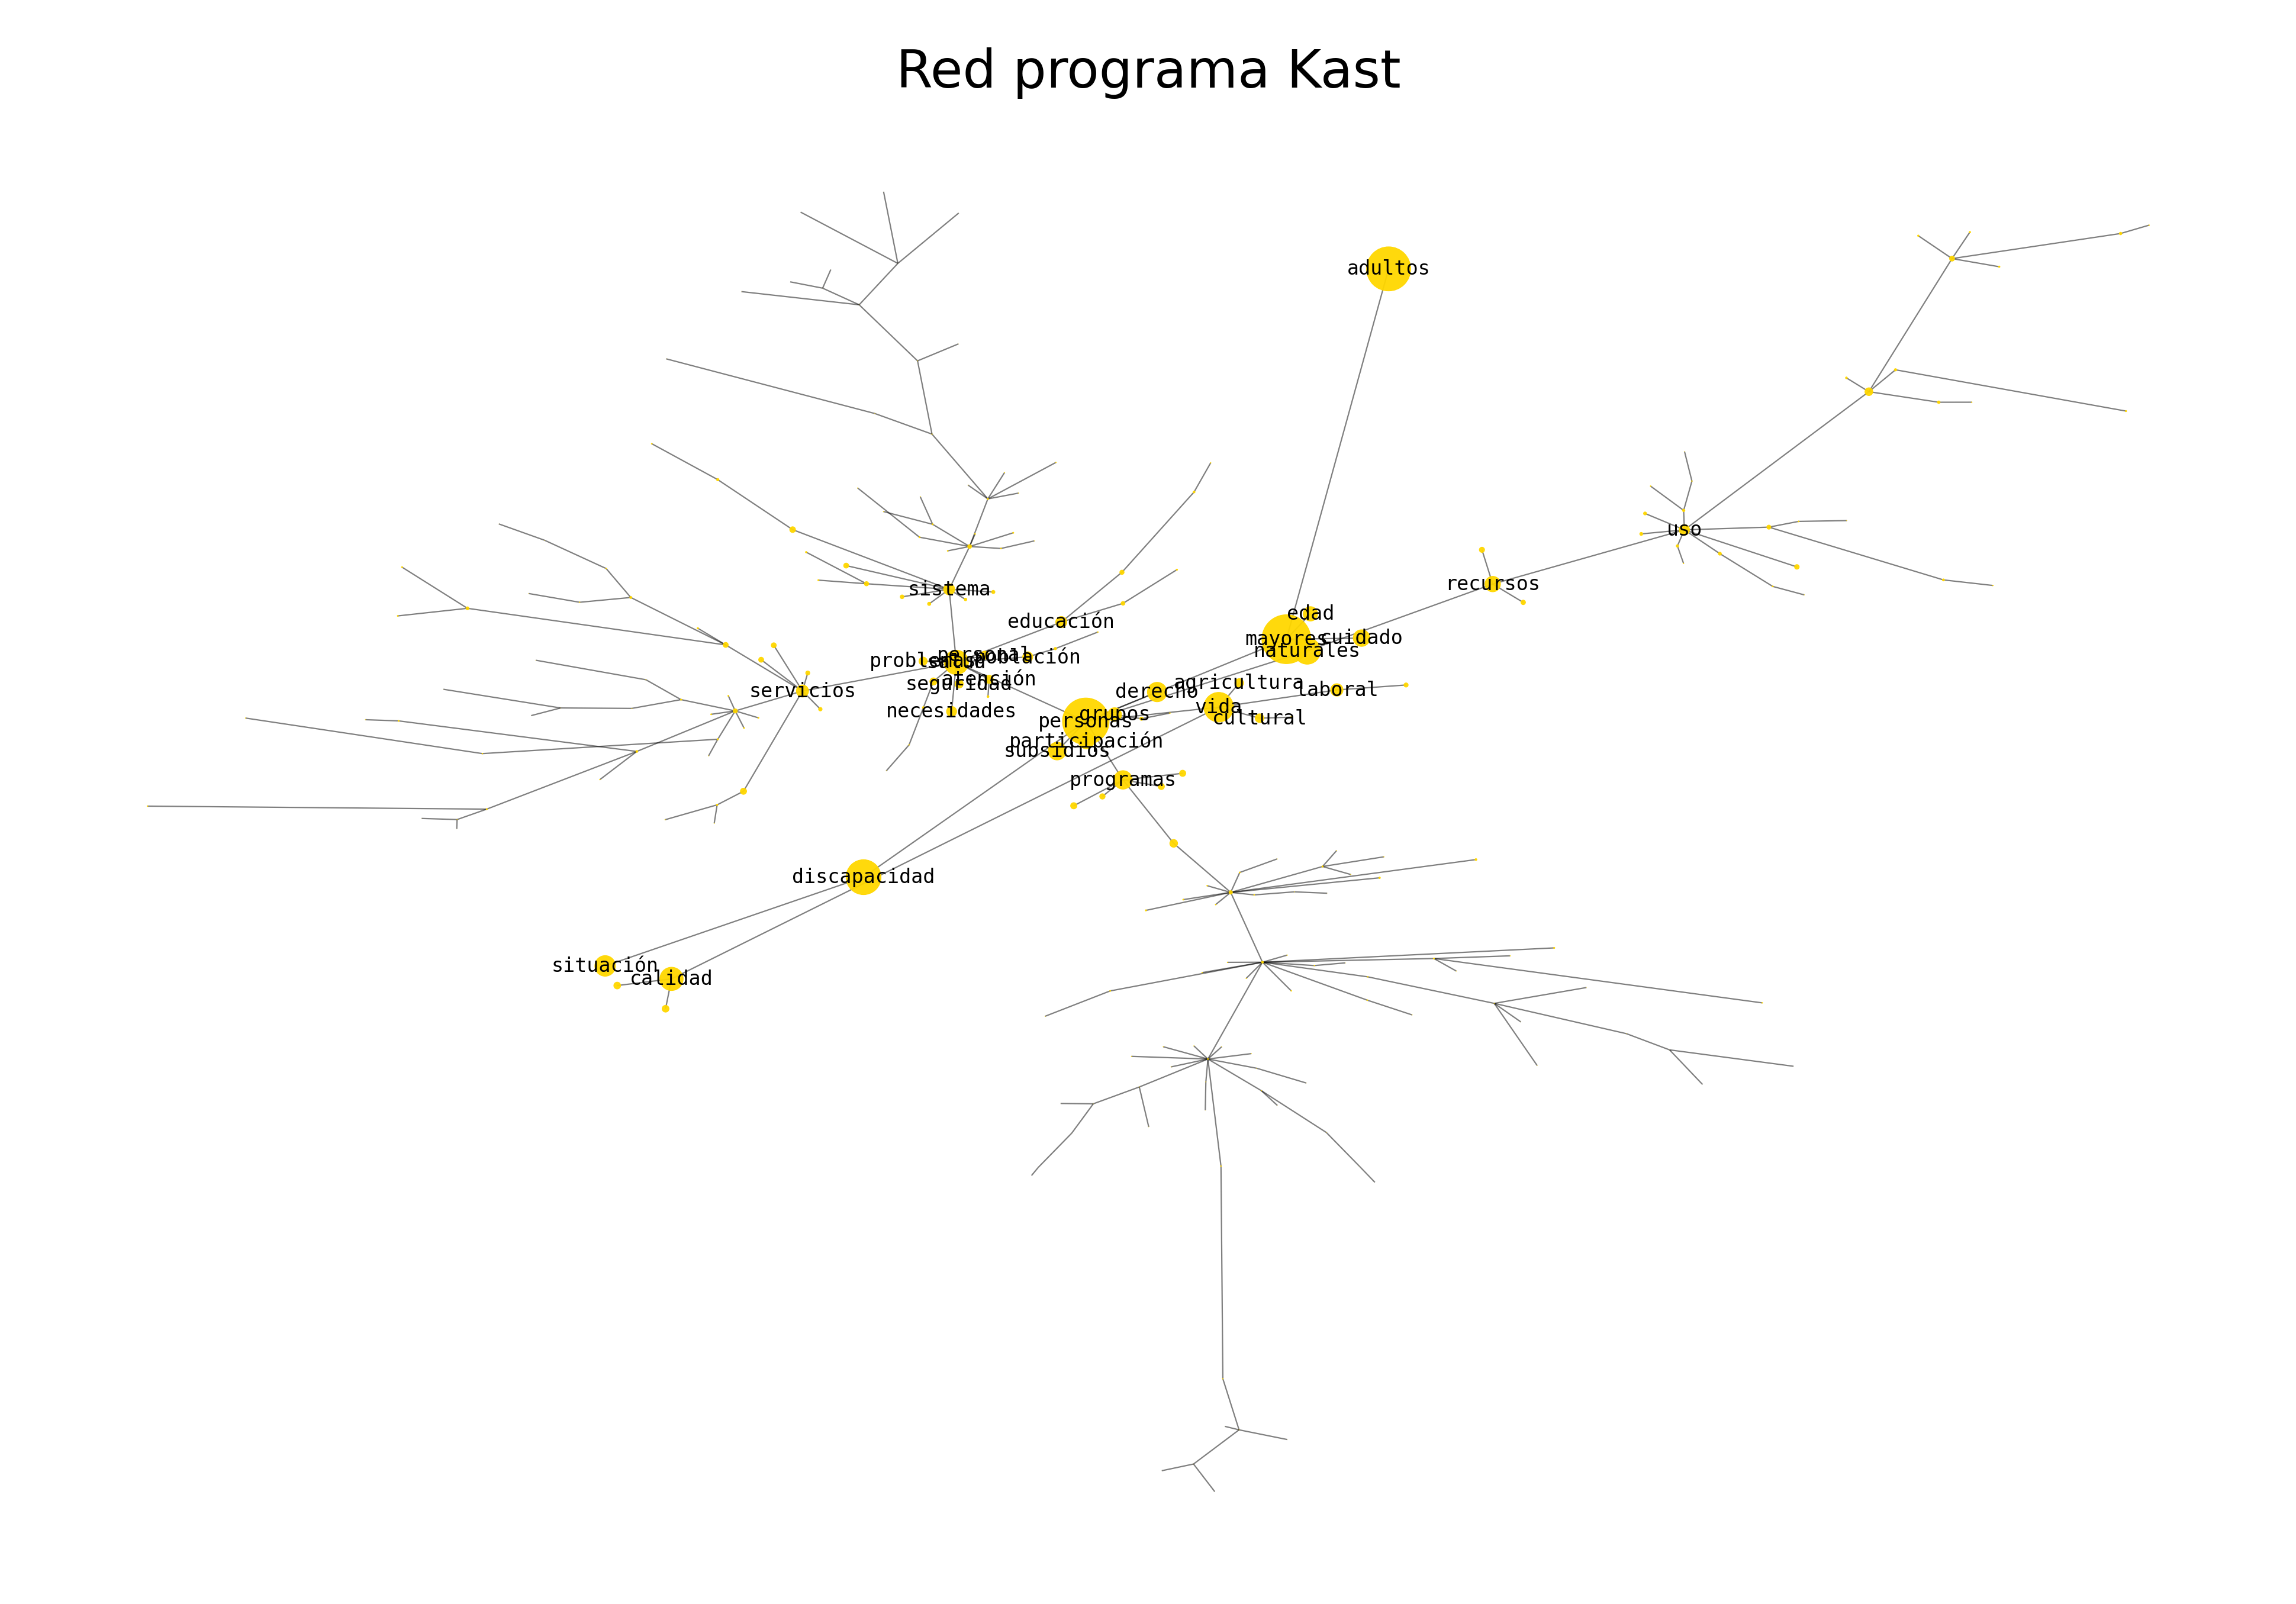

In [804]:
plotG_centrality(red_kast,100,'Kast')

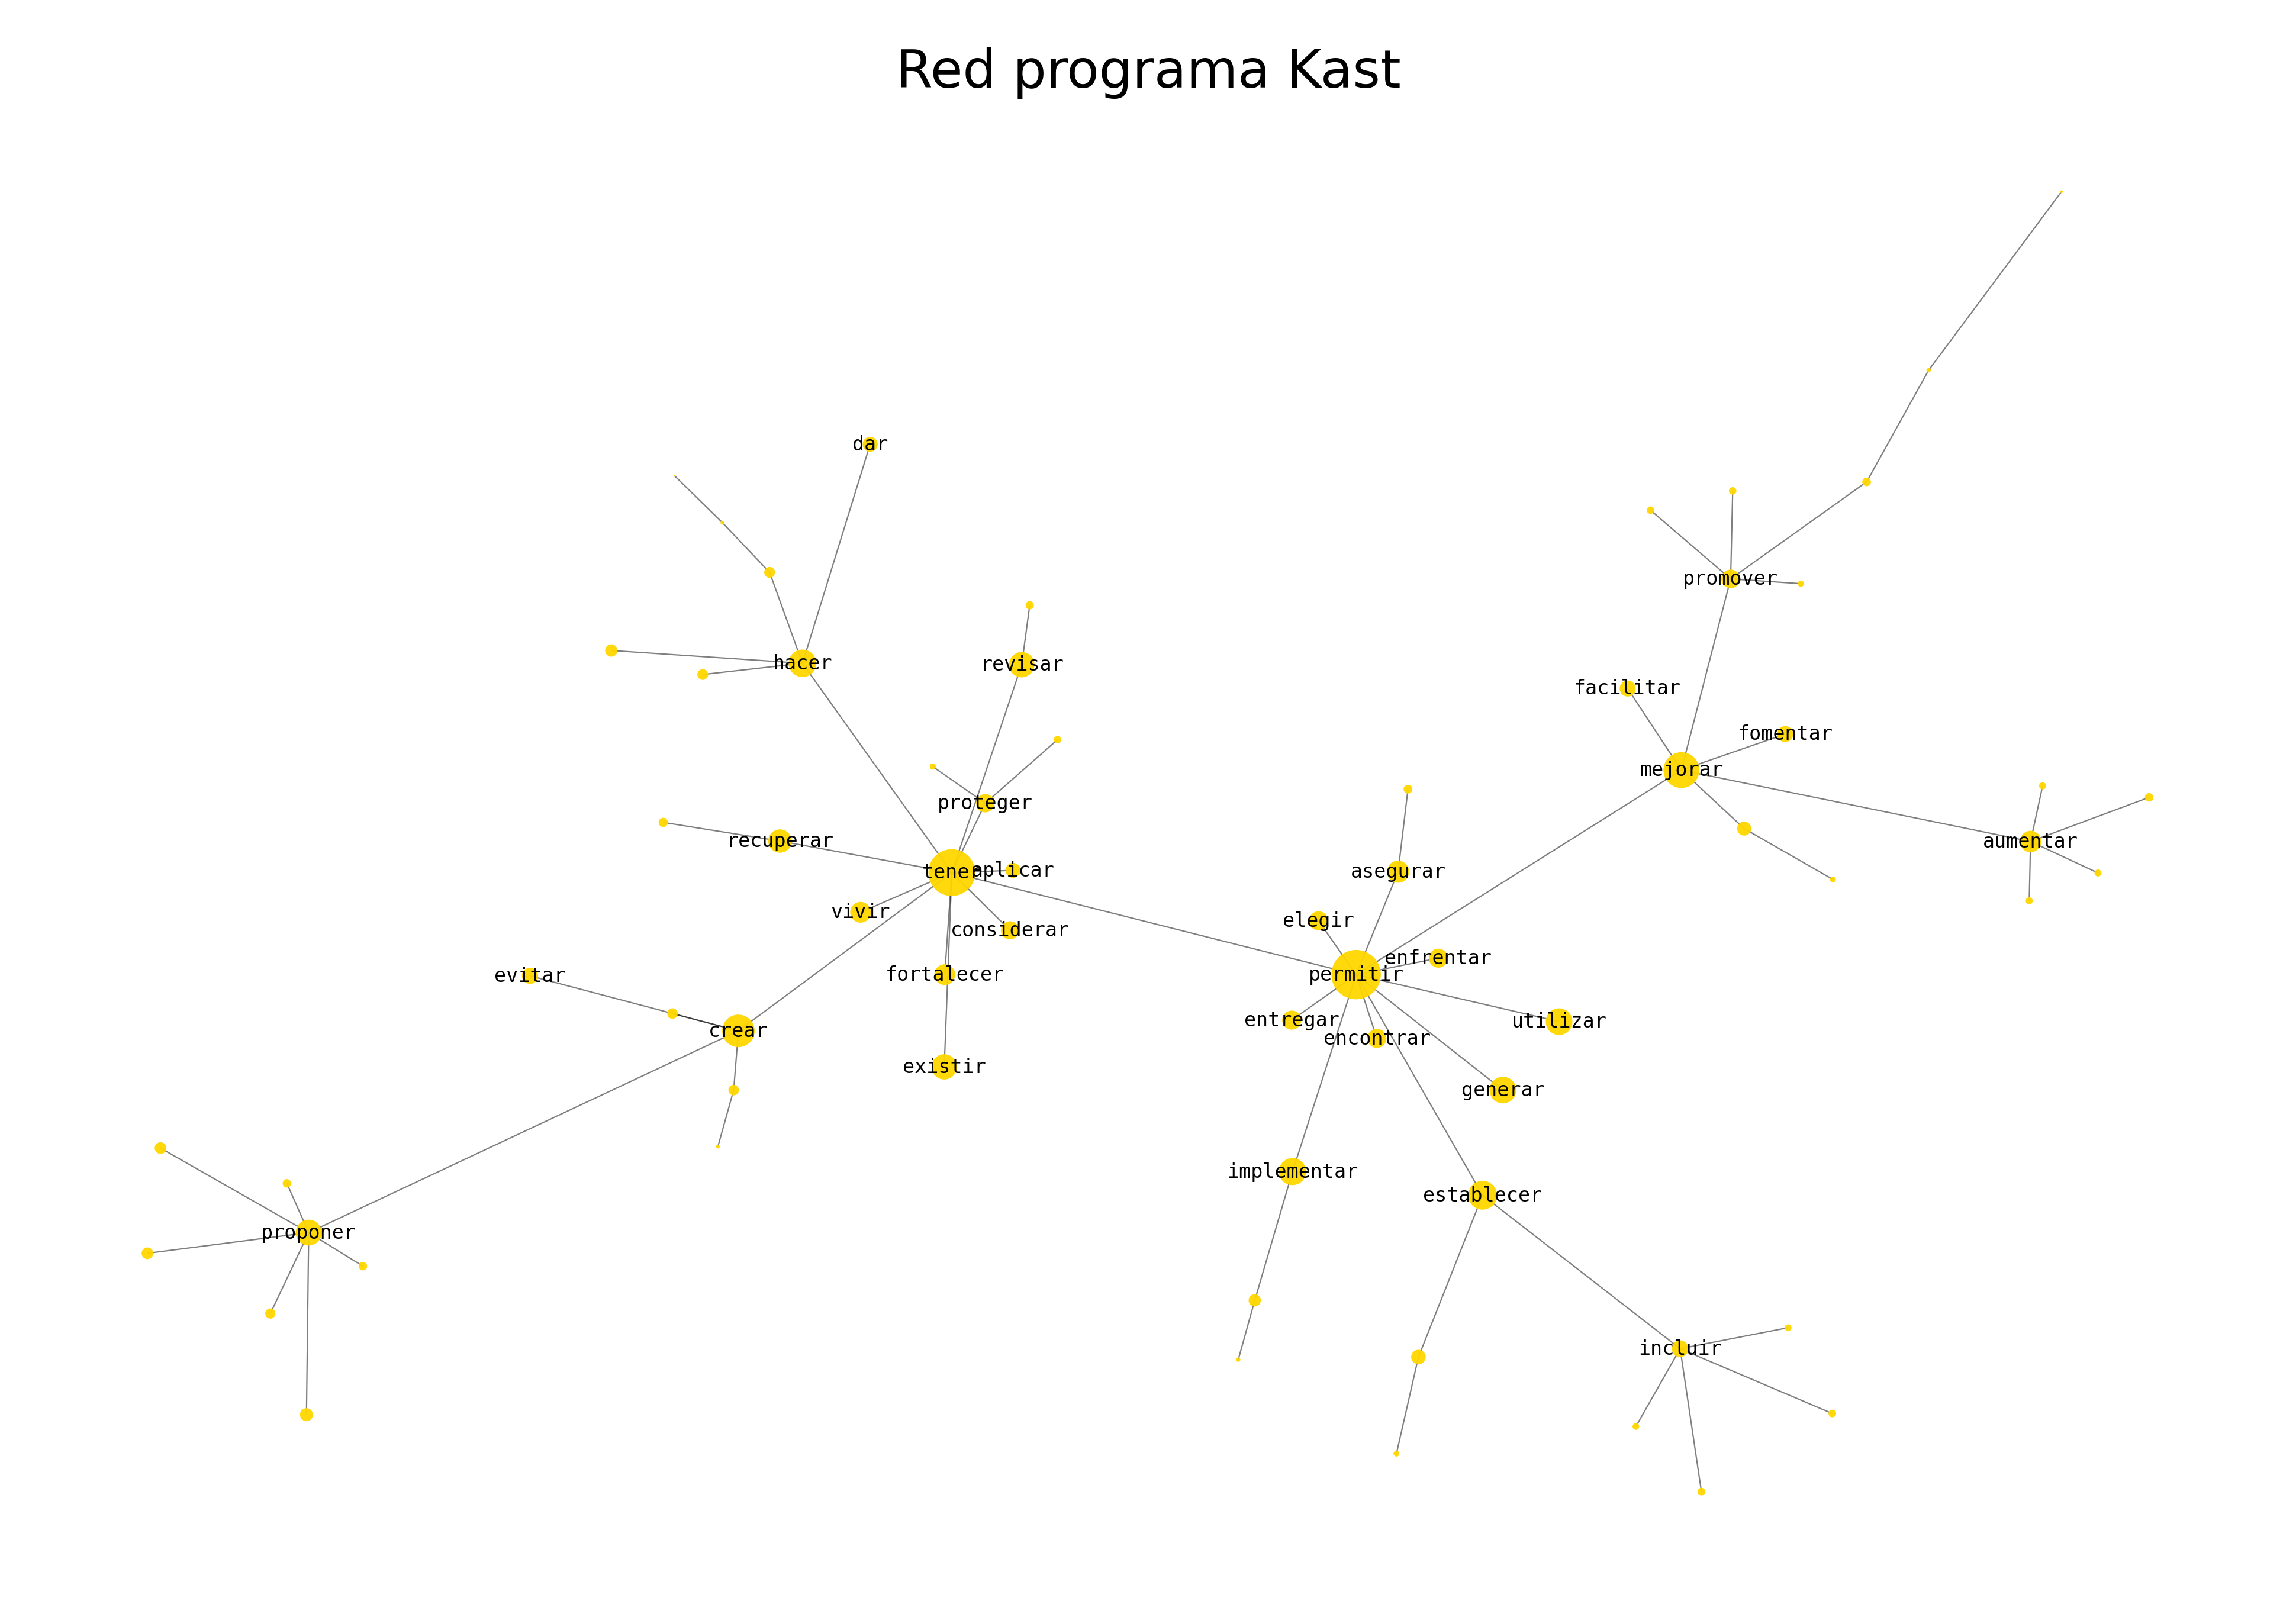

In [805]:
plotG_centrality(red_kast_verbos,100,'Kast')

In [806]:
red_boric = GoW(BORIC,radius = 2)

In [807]:
red_boric_verbos = GoW(BORIC_verbos,radius = 2)

In [808]:
len(red_boric)

4769

In [809]:
len(red_boric_verbos)

848

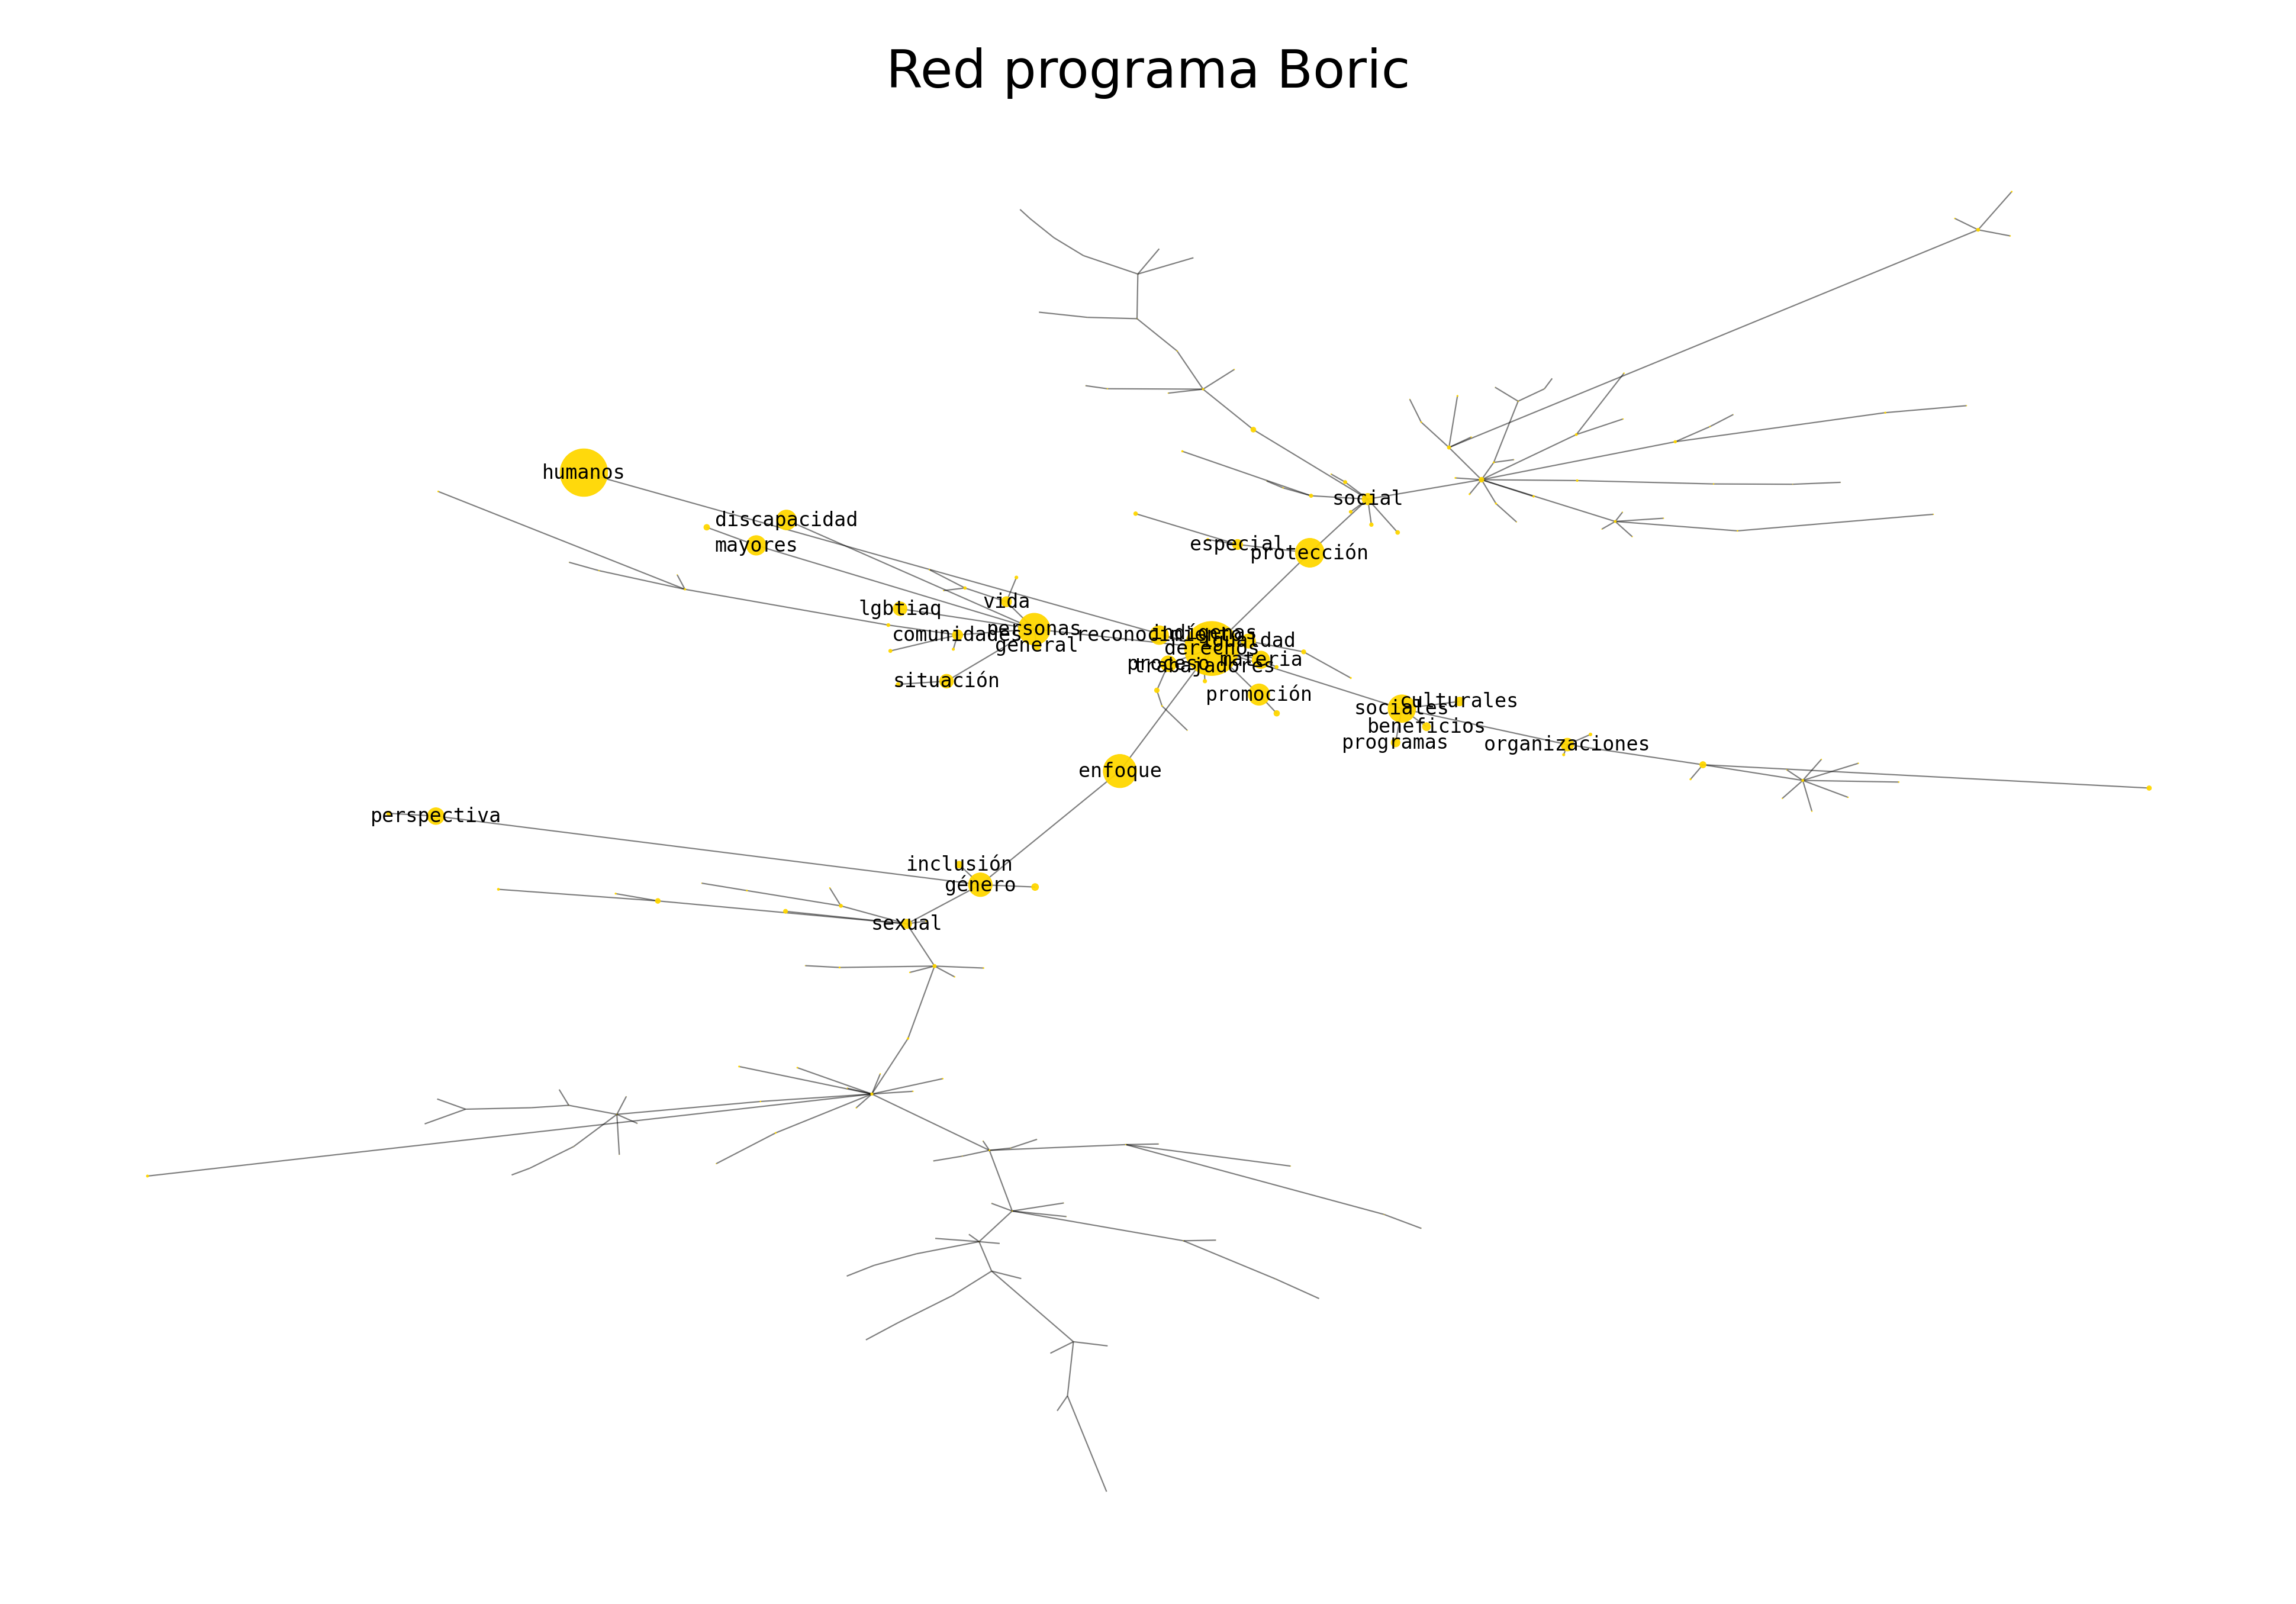

In [810]:
plotG_centrality(red_boric,100,'Boric')

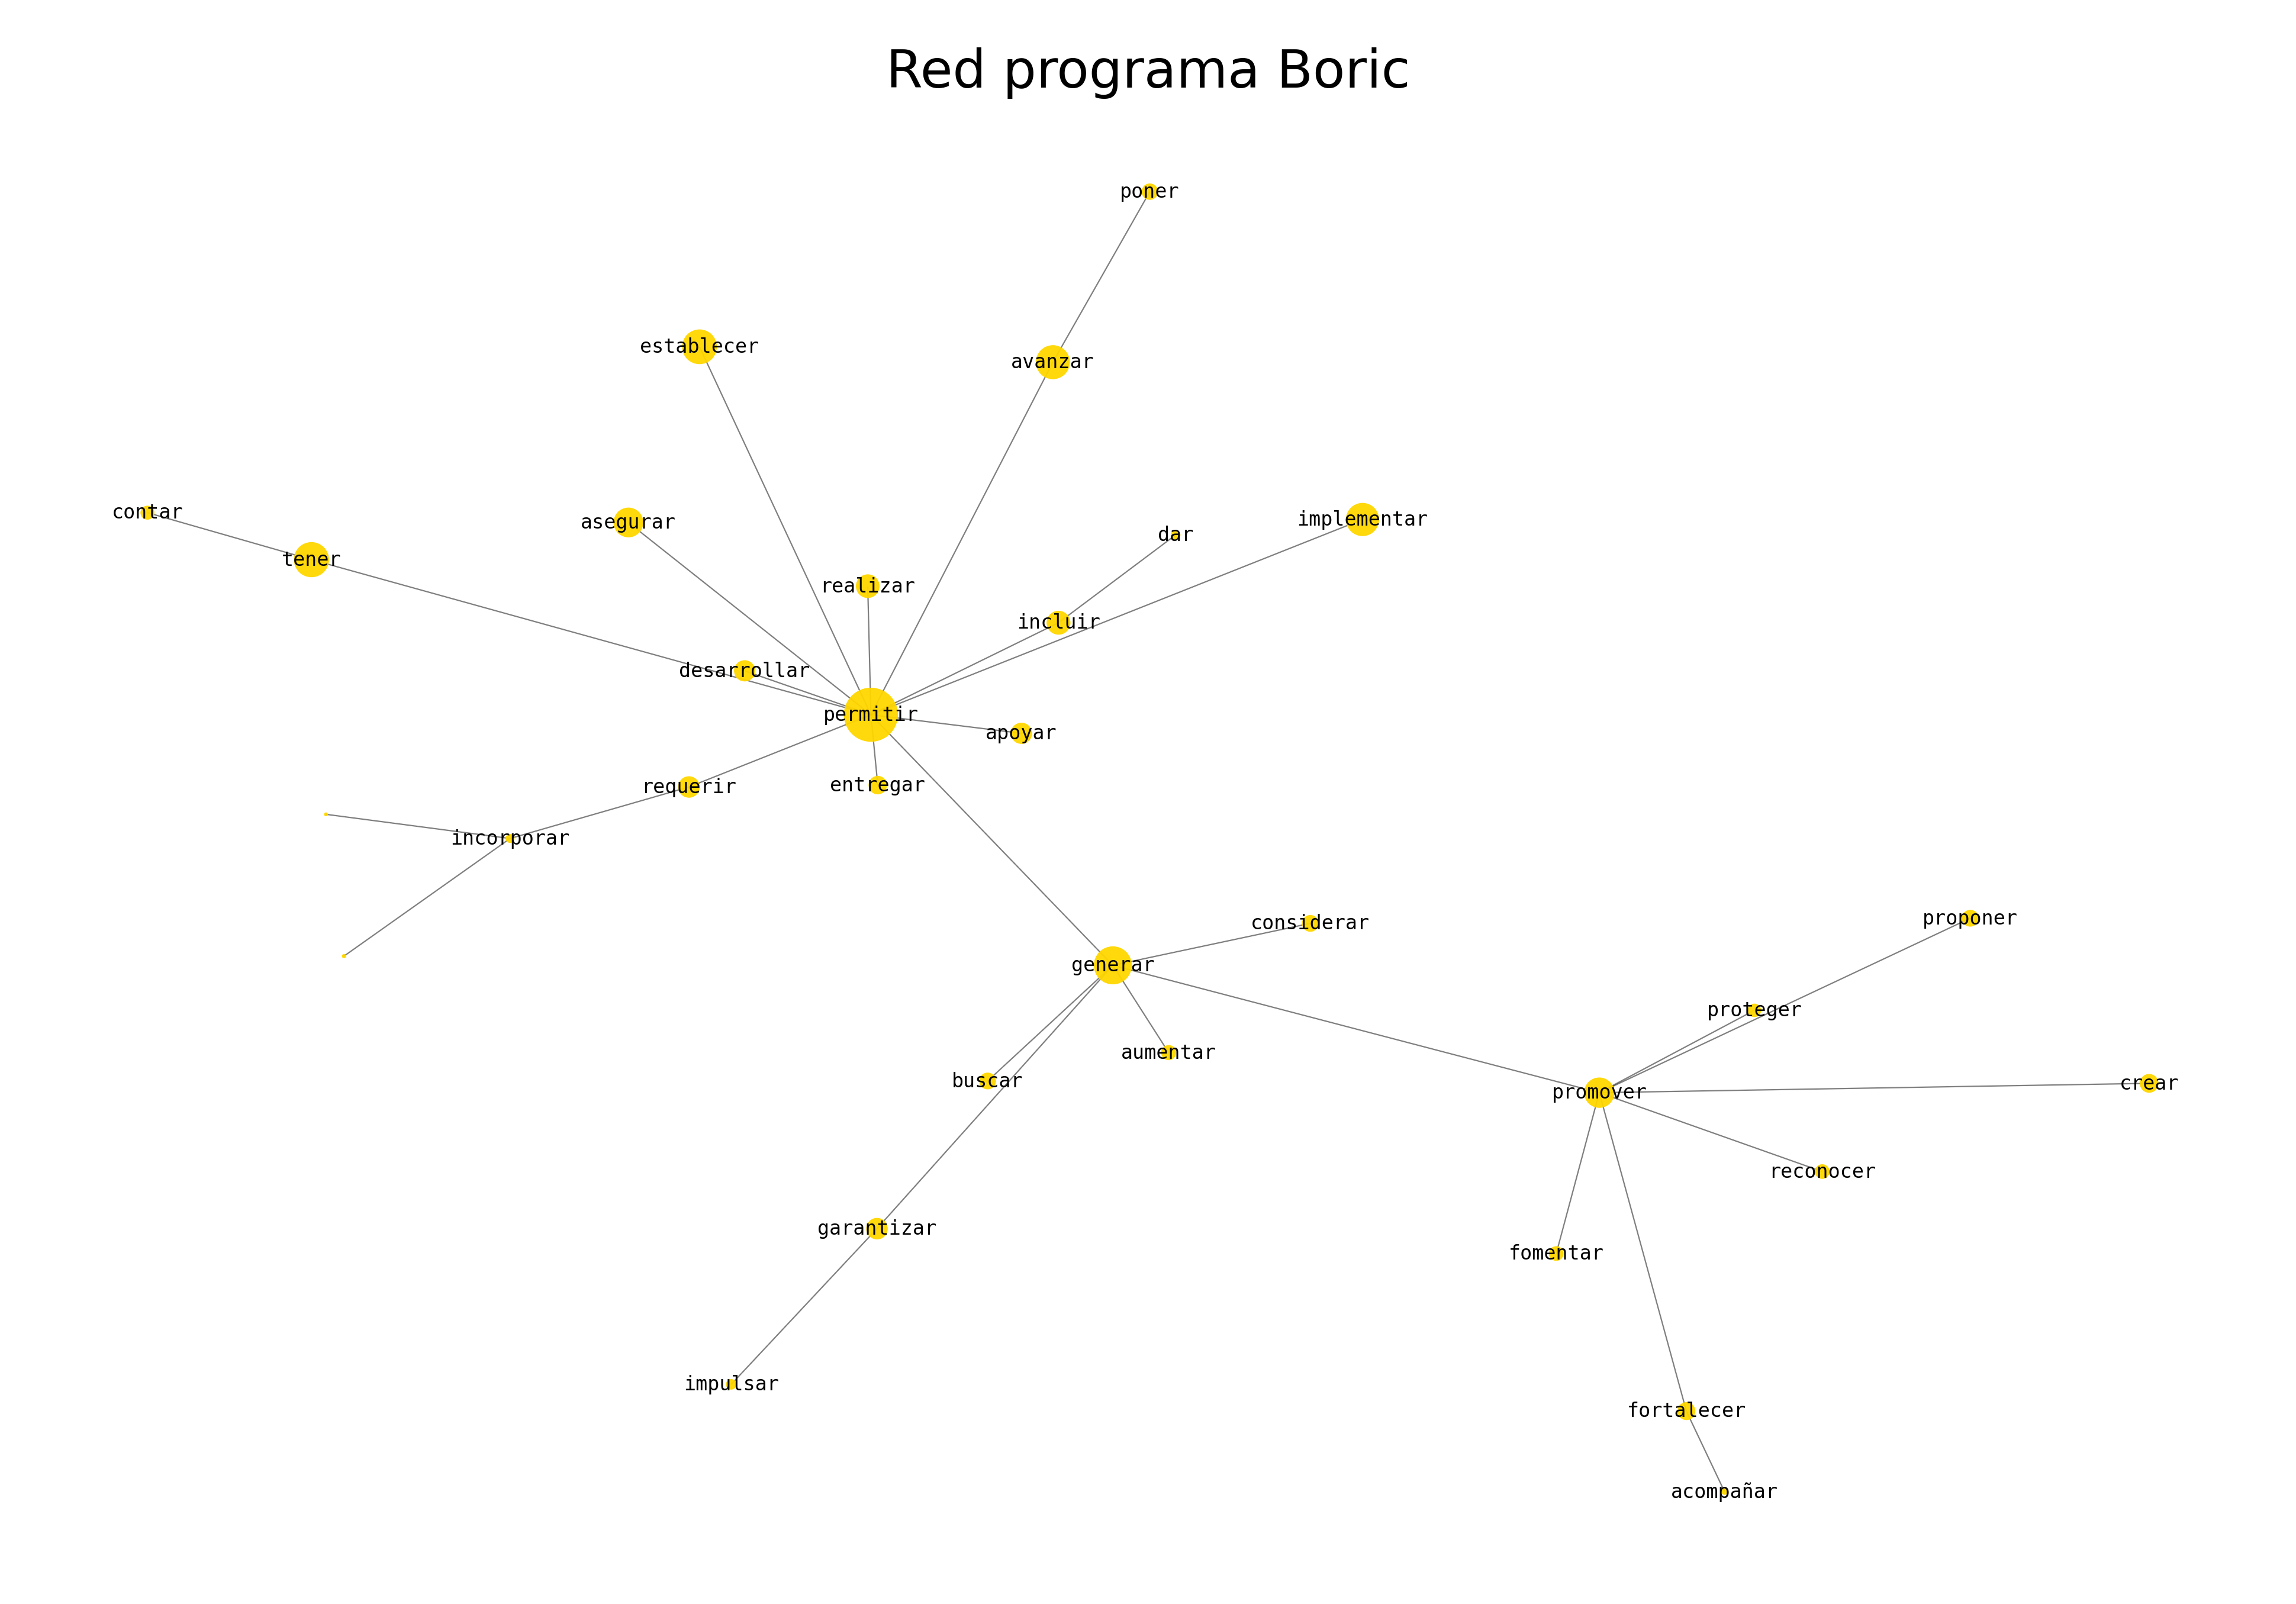

In [811]:
plotG_centrality(red_boric_verbos,100,'Boric')

In [812]:
## función para ranquear co-ocurrencias :)

def ranking(red,palabra,k):
    if palabra in red.nodes():
        return list({k: v for k, v in sorted(dict(red[palabra]).items(), key=lambda item: item[1]['weight'],reverse=True)}.keys())[:k]
    else:
        return 'la palabra no está en la red, prueba otra!'

In [813]:
ranking(red_kast,'familia',5)

['políticas', 'libertad', 'núcleo', 'familia', 'empresa']

In [814]:
ranking(red_boric,'familia',5)

['necesidades', 'protección', 'persona', 'decisiones', 'básicas']

In [815]:
ranking(red_kast_verbos,'garantizar',5)

['asegurar', 'contar', 'corresponder', 'proponer', 'existir']

In [816]:
ranking(red_boric_verbos,'garantizar',5)

['generar', 'proponer', 'tener', 'impulsar', 'ampliar']

## Representaciones en dos dimensiones!

In [818]:
import numpy as np
import numpy.linalg as la

In [971]:
G = red_kast.copy()
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.k_core(G)

In [972]:
len(G)

242

In [973]:
A_kast = nx.adjacency_matrix(G)

In [974]:
D_kast = np.diag(np.ravel(np.sum(A_kast,axis=1)))

In [975]:
L_kast = D_kast-A_kast

In [976]:
l, U = la.eigh(L_kast)

In [1025]:
features_kast = U[:,1:51]

In [1026]:
features_kast = dict(zip(G.nodes(),[np.array(item)[0] for item in features_kast]))

In [1033]:
## proyectamos los datos en 2D

## en X guardamos todas las listas de rasgos

X=[]
for word in features_kast.keys():
    X+=[list(features_kast[word])]

In [1034]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components=2,kernel="rbf")
X = pca.fit_transform(X)

In [1035]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

In [1036]:
from sklearn import metrics
from sklearn.cluster import KMeans
S_NN = {}
for k in [2,3,4,5,6,7,8,9,10]:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    S_NN[k]=metrics.silhouette_score(X, labels, metric='euclidean')

In [1037]:
S_NN

{2: 0.5542879765550824,
 3: 0.5141357571245573,
 4: 0.559653363584986,
 5: 0.34619205015739707,
 6: 0.373169492758995,
 7: 0.39498790638634257,
 8: 0.399271796653113,
 9: 0.3568004138112664,
 10: 0.36469007704074424}

In [1041]:
centrality = nx.eigenvector_centrality(G,weight='weight',max_iter=1000)
ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
labels = [i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:5]))[0]]

No handles with labels found to put in legend.


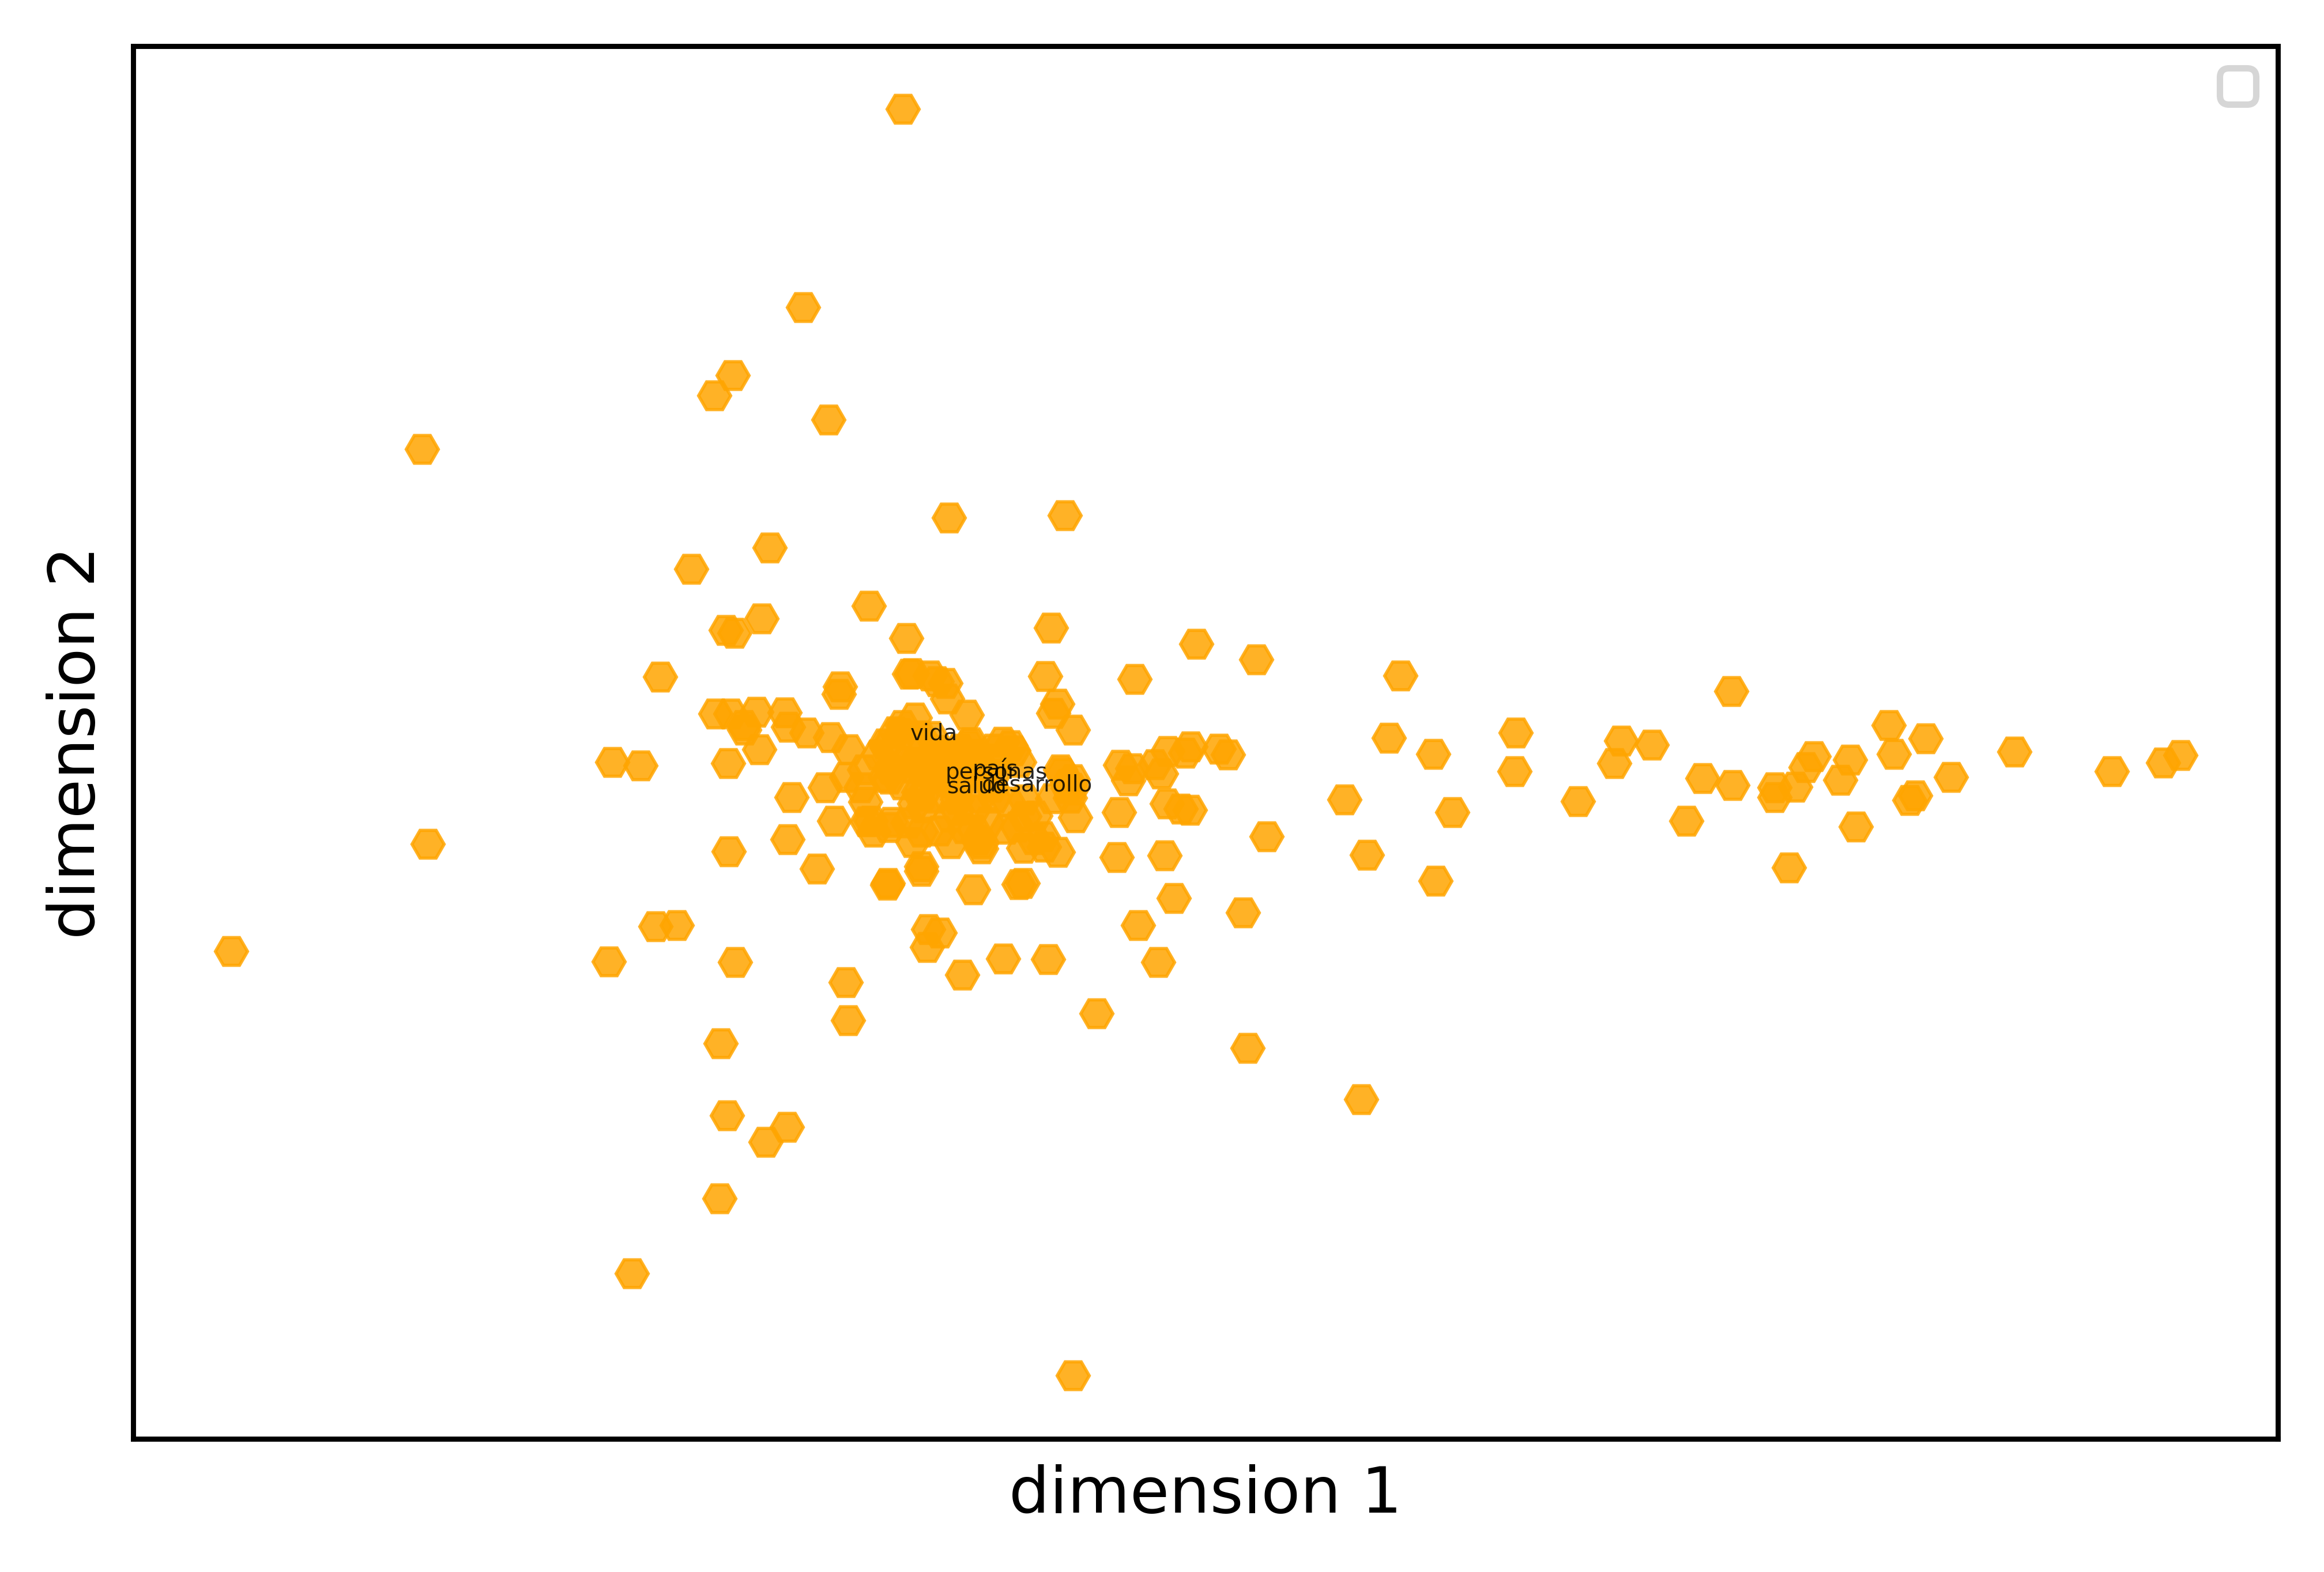

In [1042]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

for word in labels:
    i = list(G.nodes()).index(word)
    ax.annotate(word, color='k', xy=(x[i]-0.0004,y[i]-0.0004), fontsize=3.5, alpha=0.85)
#        ax.annotate(labels[i], weight='demi', color='k', xy=(x[i]-0.05,y[i]-0.05), fontsize=4, alpha=0.85)

ax.plot([x[i] for i in [list(G.nodes()).index(word) for word in G.nodes()]],[y[i] for i in [list(G.nodes()).index(word) for word in G.nodes()]],'H',color='orange',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.title(str(len(languages))+' languages with '+str(len(keys_comunes))+' features',fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'dimension 2',fontsize=10)
plt.xlabel(r'dimension 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('TSNE_sails.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [1047]:
G = red_boric.copy()
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.k_core(G)

In [1048]:
len(G)

213

In [1049]:
A_boric = nx.adjacency_matrix(G)

In [1050]:
D_boric = np.diag(np.ravel(np.sum(A_boric,axis=1)))

In [1051]:
L_boric = D_boric-A_boric

In [1052]:
l, U = la.eigh(L_boric)

In [1053]:
features_boric = U[:,1:51]

In [1054]:
features_boric = dict(zip(G.nodes(),[np.array(item)[0] for item in features_boric]))

In [1055]:
## proyectamos los datos en 2D

## en X guardamos todas las listas de rasgos

X=[]
for word in features_boric.keys():
    X+=[list(features_boric[word])]

In [1056]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components=2,kernel="rbf")
X = pca.fit_transform(X)

In [1057]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

In [1058]:
from sklearn import metrics
from sklearn.cluster import KMeans
S_NN = {}
for k in [2,3,4,5,6,7,8,9,10]:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    S_NN[k]=metrics.silhouette_score(X, labels, metric='euclidean')

In [1059]:
S_NN

{2: 0.5640753742364403,
 3: 0.627939818810827,
 4: 0.4687309573183881,
 5: 0.4529073175291134,
 6: 0.4464014294804011,
 7: 0.40956361978167416,
 8: 0.40996165028553505,
 9: 0.400960126563238,
 10: 0.38533141966492496}

In [1060]:
centrality = nx.eigenvector_centrality(G,weight='weight',max_iter=1000)
ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
labels = [i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:5]))[0]]

No handles with labels found to put in legend.


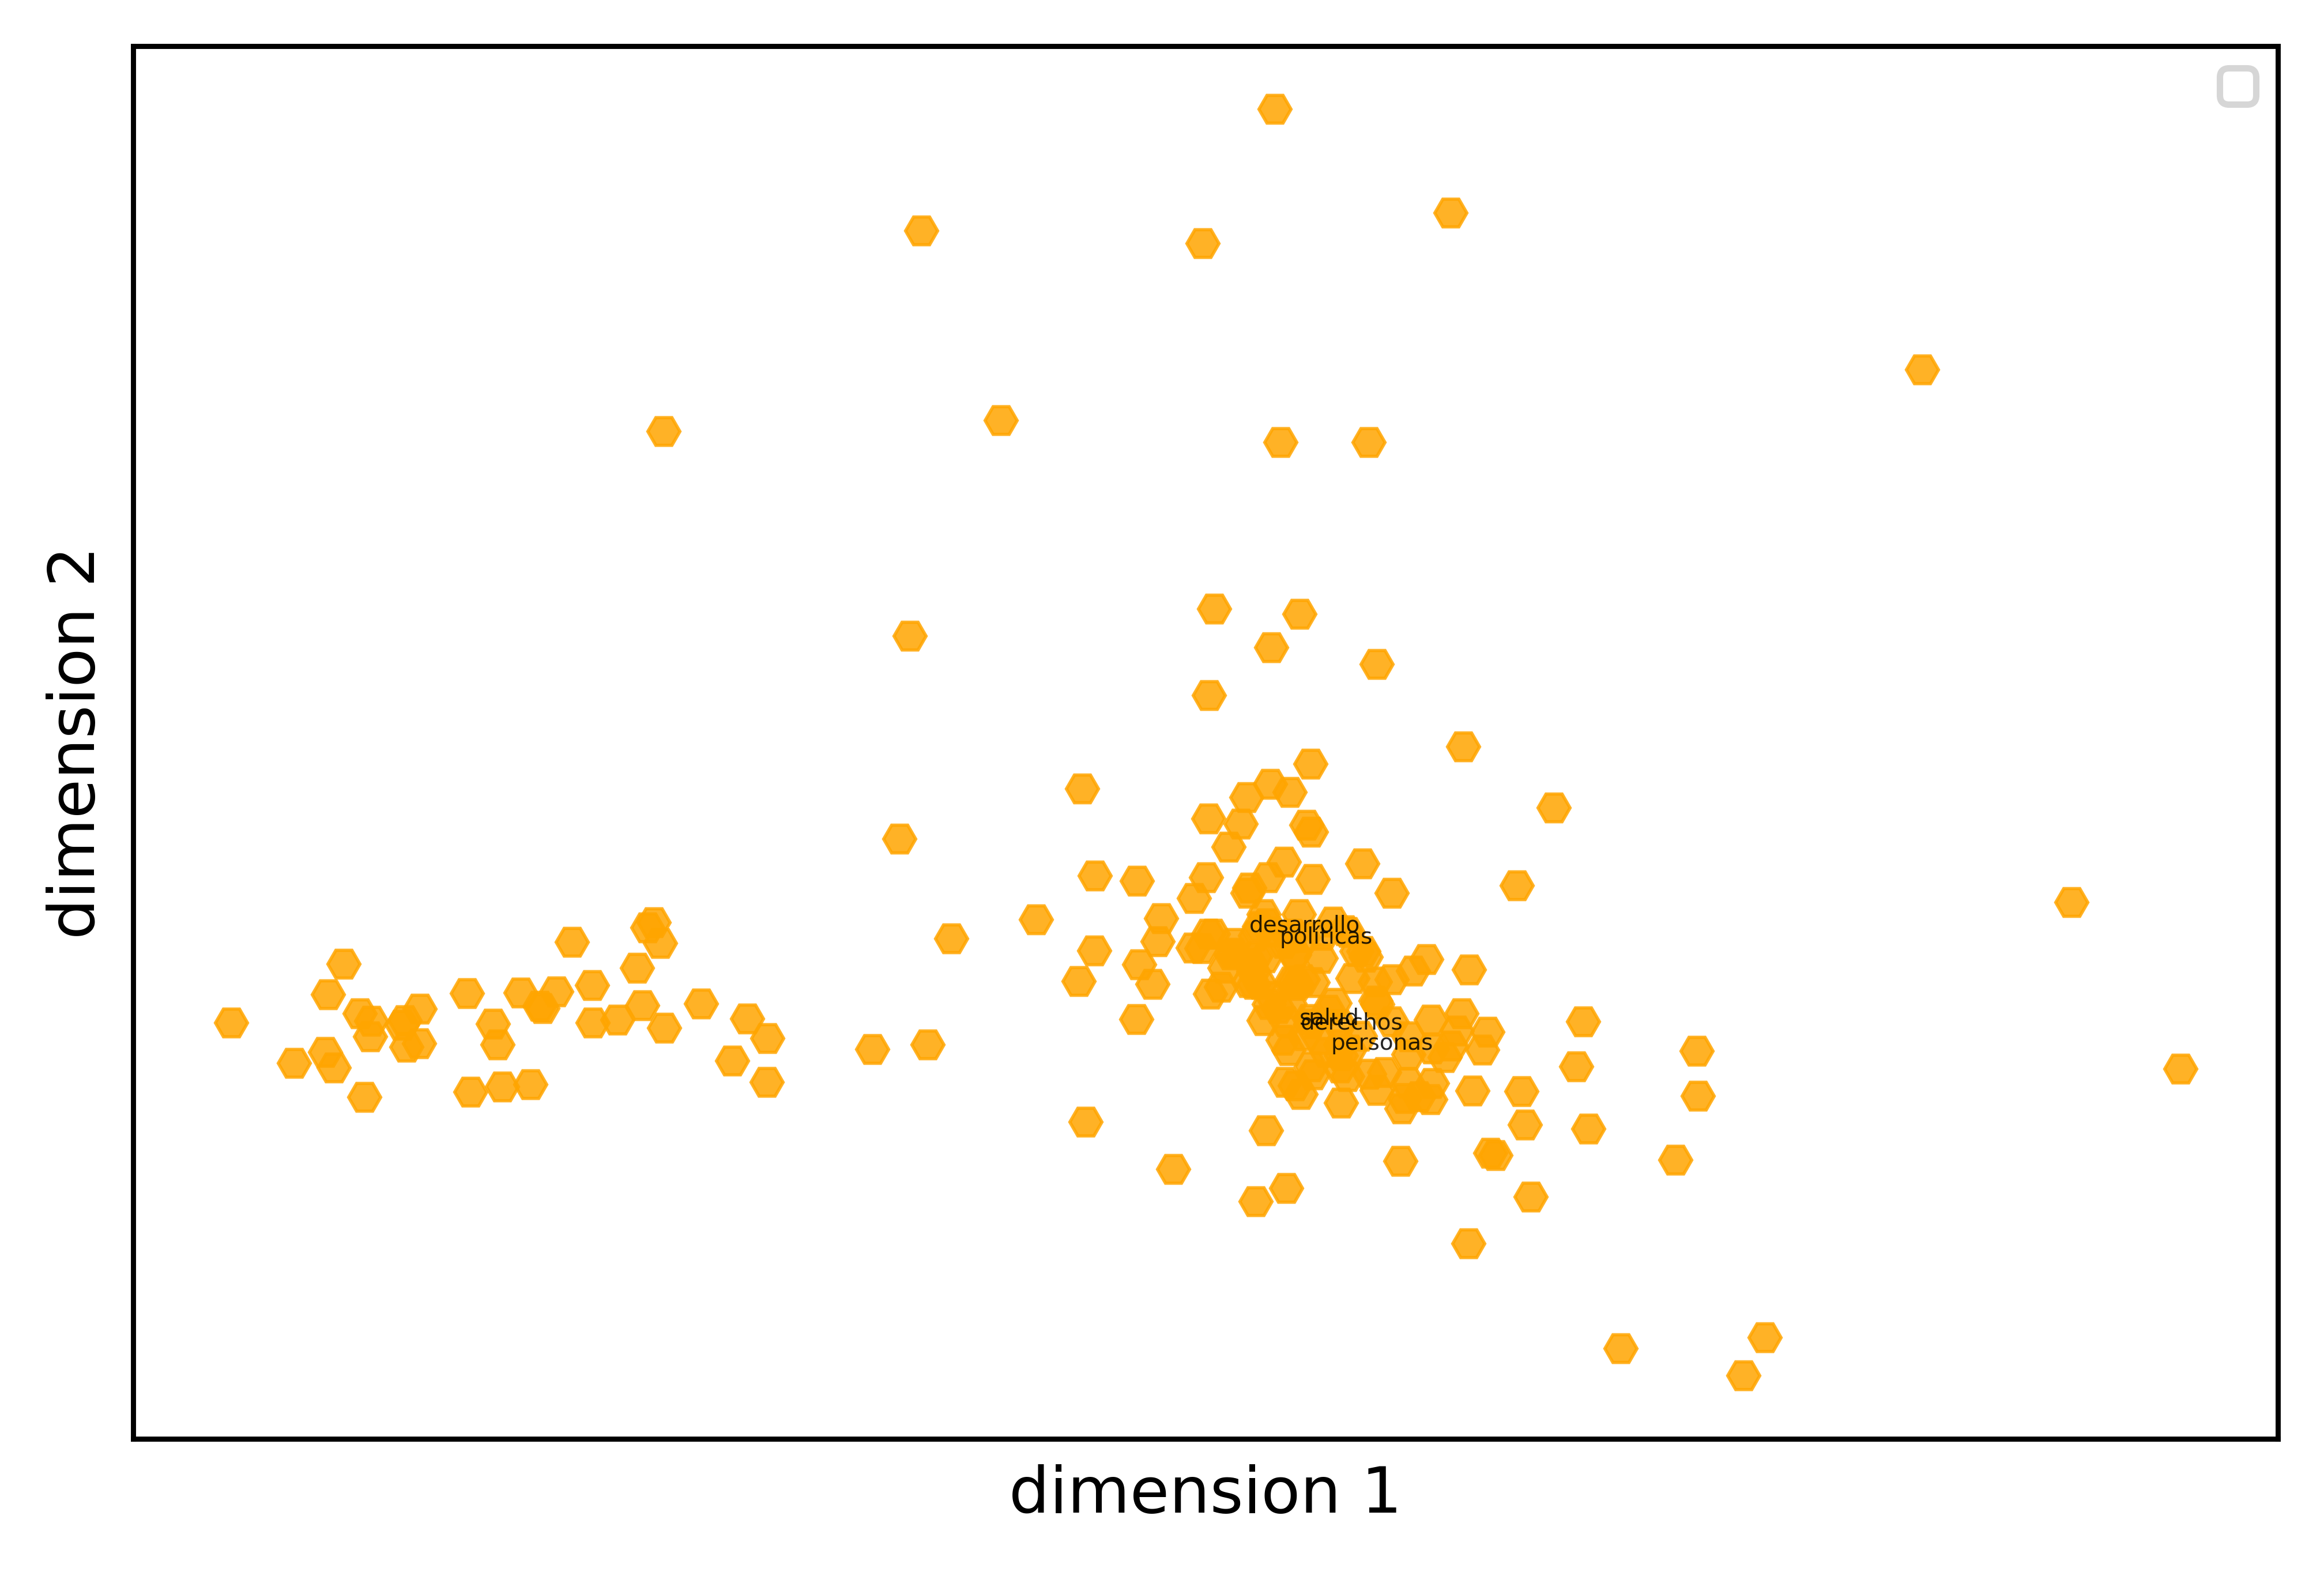

In [1061]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('RdBu')

fig, ax = plt.subplots(dpi=800)

for word in labels:
    i = list(G.nodes()).index(word)
    ax.annotate(word, color='k', xy=(x[i]-0.0004,y[i]-0.0004), fontsize=3.5, alpha=0.85)
#        ax.annotate(labels[i], weight='demi', color='k', xy=(x[i]-0.05,y[i]-0.05), fontsize=4, alpha=0.85)

ax.plot([x[i] for i in [list(G.nodes()).index(word) for word in G.nodes()]],[y[i] for i in [list(G.nodes()).index(word) for word in G.nodes()]],'H',color='orange',markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.title(str(len(languages))+' languages with '+str(len(keys_comunes))+' features',fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'dimension 2',fontsize=10)
plt.xlabel(r'dimension 1',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('TSNE_sails.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

## 2. Análisis de distancias entre lenguas

In [1062]:
import pandas as pd

sails = pd.read_pickle('rasgos_sails.p')

In [1084]:
id_family = pd.read_pickle('families.p')

In [1069]:
sails.keys()

dict_keys(['agua1253', 'yane1238', 'apur1254', 'apal1257', 'arhu1242', 'mapu1245', 'karo1305', 'araw1276', 'awet1244', 'cent2142', 'bora1263', 'boro1282', 'baur1253', 'chip1262', 'mose1249', 'cavi1250', 'chay1248', 'chol1284', 'coca1259', 'colo1256', 'cube1242', 'desa1247', 'emer1243', 'nort2972', 'guat1253', 'hixk1239', 'inga1252', 'iton1250', 'jama1261', 'hupd1244', 'juru1256', 'kama1373', 'kari1311', 'daww1239', 'awac1239', 'kano1245', 'leco1242', 'lako1248', 'sate1243', 'mats1244', 'moco1246', 'maku1278', 'wich1262', 'mund1330', 'movi1243', 'moch1259', 'pare1272', 'wari1268', 'paez1247', 'pila1245', 'puin1248', 'hual1241', 'sout2991', 'sout2990', 'sant1432', 'tena1240', 'yauy1235', 'ayac1239', 'cusc1236', 'caja1238', 'imba1240', 'nort2980', 'paca1245', 'sanm1289', 'huay1240', 'sala1272', 'jauj1238', 'cane1242', 'rikb1245', 'saba1268', 'nina1238', 'ship1254', 'saki1248', 'tari1256', 'tehu1242', 'tapi1253', 'trum1247', 'trio1238', 'ikpe1245', 'urar1246', 'uruu1244', 'wara1303', 'wayo

In [1064]:
sails['mapu1245']

{'ARGEX5-1': 'ARGEX5-1-C',
 'ARGEX5-2': 'ARGEX5-2-C',
 'ARGEX5-3': 'ARGEX5-3-C',
 'ARGEX5-4': 'ARGEX5-4-C',
 'ARGEX5-5': 'ARGEX5-5-D',
 'ARGEX5-6': 'ARGEX5-6-C',
 'ARGEX5-7': 'ARGEX5-7-C',
 'ARGEX5-8': 'ARGEX5-8-C',
 'ARGEX5-9': 'ARGEX5-9-B'}

In [1067]:
def hamming(glotto1,glotto2):
    d = 0
    n = 0
    language1 = sails[glotto1]
    language2 = sails[glotto2]
    for feat in language1.keys():
        if feat in language2.keys():
            if language1[feat] != language2[feat]:
                d += 1.0
            n += 1.0
    return d/n

In [1070]:
hamming('mapu1245','nort2980')

0.6666666666666666

In [1072]:
distances_dict = {lengua:{lengualengua:0 for lengualengua in sails.keys()} for lengua in sails.keys()}

for lengua in sails.keys():
    for lengualengua in sails.keys():
        D=hamming(lengua,lengualengua)
        distances_dict[lengua][lengualengua]=D

In [1074]:
DF = pd.DataFrame.from_dict(distances_dict,orient = 'index', columns = pd.DataFrame.from_dict(distances_dict).index)

In [1075]:
DF

,agua1253,yane1238,apur1254,apal1257,arhu1242,mapu1245,karo1305,araw1276,awet1244,cent2142,...,ikpe1245,urar1246,uruu1244,wara1303,wayo1238,xava1240,kwaz1243,yami1256,nhen1239,yura1255
agua1253,0.000000,0.555556,0.555556,0.555556,0.666667,0.555556,0.555556,0.555556,0.555556,0.111111,...,0.555556,0.555556,0.333333,0.444444,0.444444,0.444444,0.222222,0.444444,0.555556,0.555556
yane1238,0.555556,0.000000,0.222222,0.222222,0.555556,0.000000,0.222222,0.222222,0.222222,0.666667,...,0.222222,0.222222,0.222222,0.333333,0.333333,0.333333,0.666667,0.444444,0.333333,0.000000
apur1254,0.555556,0.222222,0.000000,0.000000,0.333333,0.222222,0.000000,0.000000,0.000000,0.444444,...,0.000000,0.000000,0.444444,0.111111,0.111111,0.111111,0.555556,0.666667,0.111111,0.222222
apal1257,0.555556,0.222222,0.000000,0.000000,0.333333,0.222222,0.000000,0.000000,0.000000,0.444444,...,0.000000,0.000000,0.444444,0.111111,0.111111,0.111111,0.555556,0.666667,0.111111,0.222222
arhu1242,0.666667,0.555556,0.333333,0.333333,0.000000,0.555556,0.333333,0.333333,0.333333,0.555556,...,0.333333,0.333333,0.666667,0.444444,0.444444,0.444444,0.555556,0.444444,0.444444,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xava1240,0.444444,0.333333,0.111111,0.111111,0.444444,0.333333,0.111111,0.111111,0.111111,0.333333,...,0.111111,0.111111,0.333333,0.000000,0.000000,0.000000,0.444444,0.555556,0.111111,0.333333
kwaz1243,0.222222,0.666667,0.555556,0.555556,0.555556,0.666667,0.555556,0.555556,0.555556,0.222222,...,0.555556,0.555556,0.444444,0.444444,0.444444,0.444444,0.000000,0.666667,0.555556,0.666667
yami1256,0.444444,0.444444,0.666667,0.666667,0.444444,0.444444,0.666667,0.666667,0.666667,0.555556,...,0.666667,0.666667,0.333333,0.555556,0.555556,0.555556,0.666667,0.000000,0.666667,0.444444
nhen1239,0.555556,0.333333,0.111111,0.111111,0.444444,0.333333,0.111111,0.111111,0.111111,0.444444,...,0.111111,0.111111,0.444444,0.111111,0.111111,0.111111,0.555556,0.666667,0.000000,0.333333


In [1085]:
## construyamos un heatmap :) https://seaborn.pydata.org/generated/seaborn.heatmap.html

import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
import numpy as np

def mapa_calor(D):
    
    
    linkage = hc.linkage(sp.distance.squareform(DF), method='ward')
        
    plt.figure(figsize=(10,10))
    cg=sns.clustermap(D,cmap='OrRd',row_linkage=linkage, col_linkage=linkage,linewidth=1,yticklabels=True,xticklabels=True,cbar_kws={'shrink': 0.3})
       
    fam=[]
    for tick_label in cg.ax_heatmap.axes.get_yticklabels():
        tick_text = tick_label.get_text()
        fam += [id_family[tick_text]]
    
    cg.ax_heatmap.axes.set_xticks(np.arange(0.5,len(fam)+0.5))
    cg.ax_heatmap.axes.set_xticklabels(fam)
    cg.ax_heatmap.axes.set_yticks(np.arange(0.5,len(fam)+0.5))
    cg.ax_heatmap.axes.set_yticklabels(fam)
            
    cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_ymajorticklabels(), fontsize = 6)
    cg.ax_heatmap.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), fontsize = 6)
    plt.rcParams.update({'font.size': 12})
    plt.savefig('heatmap.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)

<Figure size 720x720 with 0 Axes>

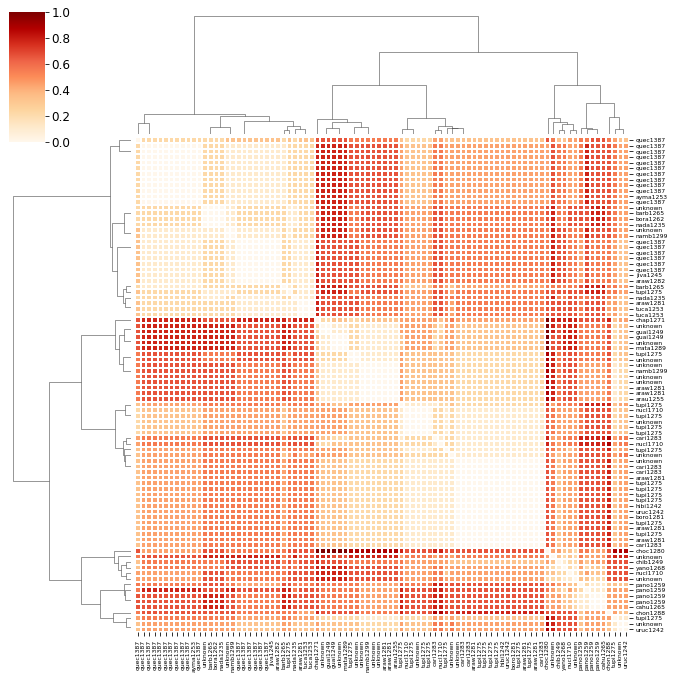

In [1086]:
mapa_calor(distances_dict)

In [1087]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

labels_dict = {}

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
S = []
for n_clusters in range_n_clusters:
    
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    distArray = sp.distance.squareform(DF.to_numpy())
    cluster_labels = cluster.fit_predict(DF.values)
    labels_dict[n_clusters]=cluster_labels
    silhouette_avg = silhouette_score(DF.values, cluster_labels, metric = 'precomputed')
    S.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.5073318598807014
For n_clusters = 3 The average silhouette_score is : 0.6214222433741359
For n_clusters = 4 The average silhouette_score is : 0.6329074408606252
For n_clusters = 5 The average silhouette_score is : 0.6551664306645036
For n_clusters = 6 The average silhouette_score is : 0.6293145354032884
For n_clusters = 7 The average silhouette_score is : 0.5599204823802233
For n_clusters = 8 The average silhouette_score is : 0.5447462349995597
For n_clusters = 9 The average silhouette_score is : 0.5236625537521082
For n_clusters = 10 The average silhouette_score is : 0.5937158997609008


C:\Users\jxver\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\jxver\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\jxver\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
C:\Users\jxver\anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an unconde